In [6]:
%load_ext autoreload
%autoreload 2


from util import *
from myalgorithm import algorithm



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


num of infeasible pairs : 7632


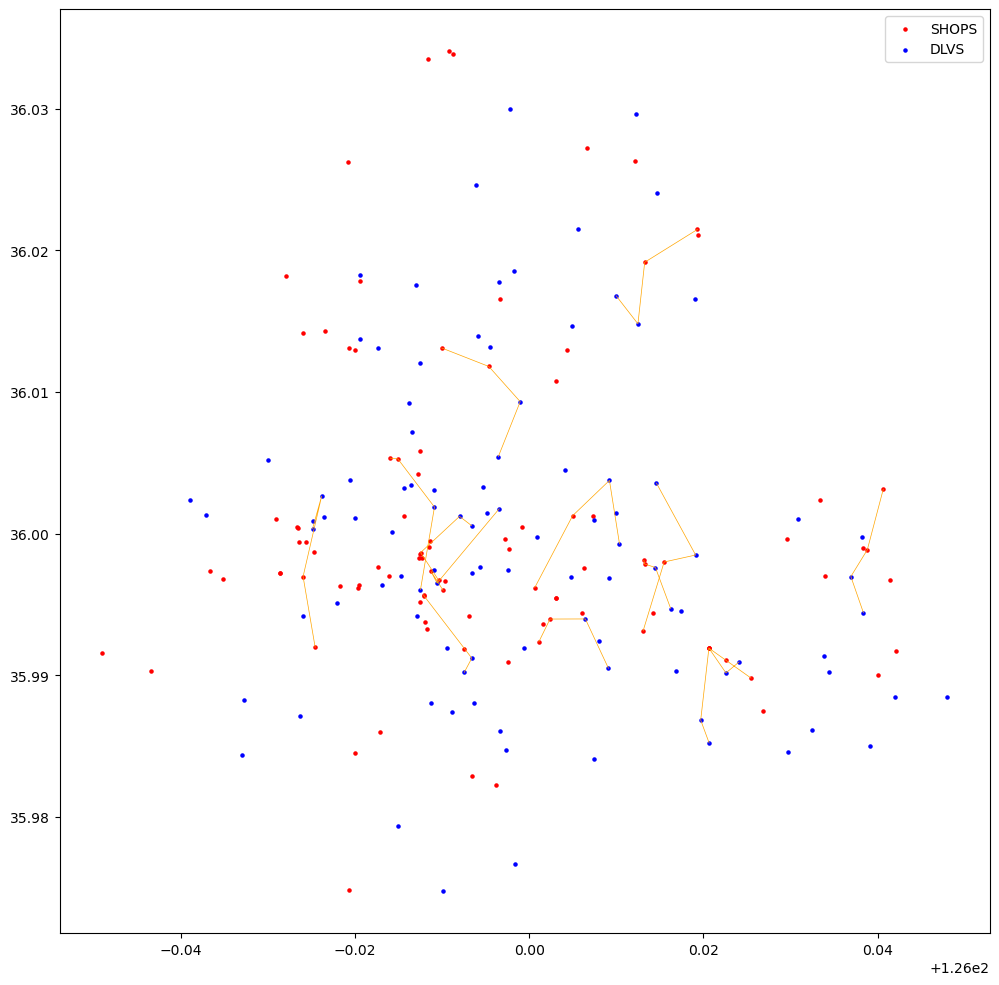

Initial best obj = 5658.084
[Bundle(all_orders, WALK, [23, 15], [23, 15], 40, True), Bundle(all_orders, WALK, [77, 80], [77, 80], 43, True), Bundle(all_orders, WALK, [46, 62], [46, 62], 24, True), Bundle(all_orders, WALK, [61, 68], [61, 68], 39, True), Bundle(all_orders, WALK, [89, 76], [89, 76], 44, True), Bundle(all_orders, WALK, [28, 35], [28, 35], 39, True), Bundle(all_orders, WALK, [52, 66], [52, 66], 36, True), Bundle(all_orders, WALK, [86, 93], [93, 86], 38, True), Bundle(all_orders, WALK, [73, 90], [73, 90], 26, True), Bundle(all_orders, WALK, [74, 98], [74, 98], 47, True), Bundle(all_orders, WALK, [56, 70], [56, 70], 33, True), Bundle(all_orders, WALK, [43, 31], [43, 31], 49, True), Bundle(all_orders, WALK, [53, 58], [58, 53], 36, True), Bundle(all_orders, WALK, [17, 39], [17, 39], 31, True), Bundle(all_orders, CAR, [0], [0], 21, True), Bundle(all_orders, CAR, [1, 41], [1, 41], 33, True), Bundle(all_orders, CAR, [2], [2], 22, True), Bundle(all_orders, CAR, [3], [3], 44, True),

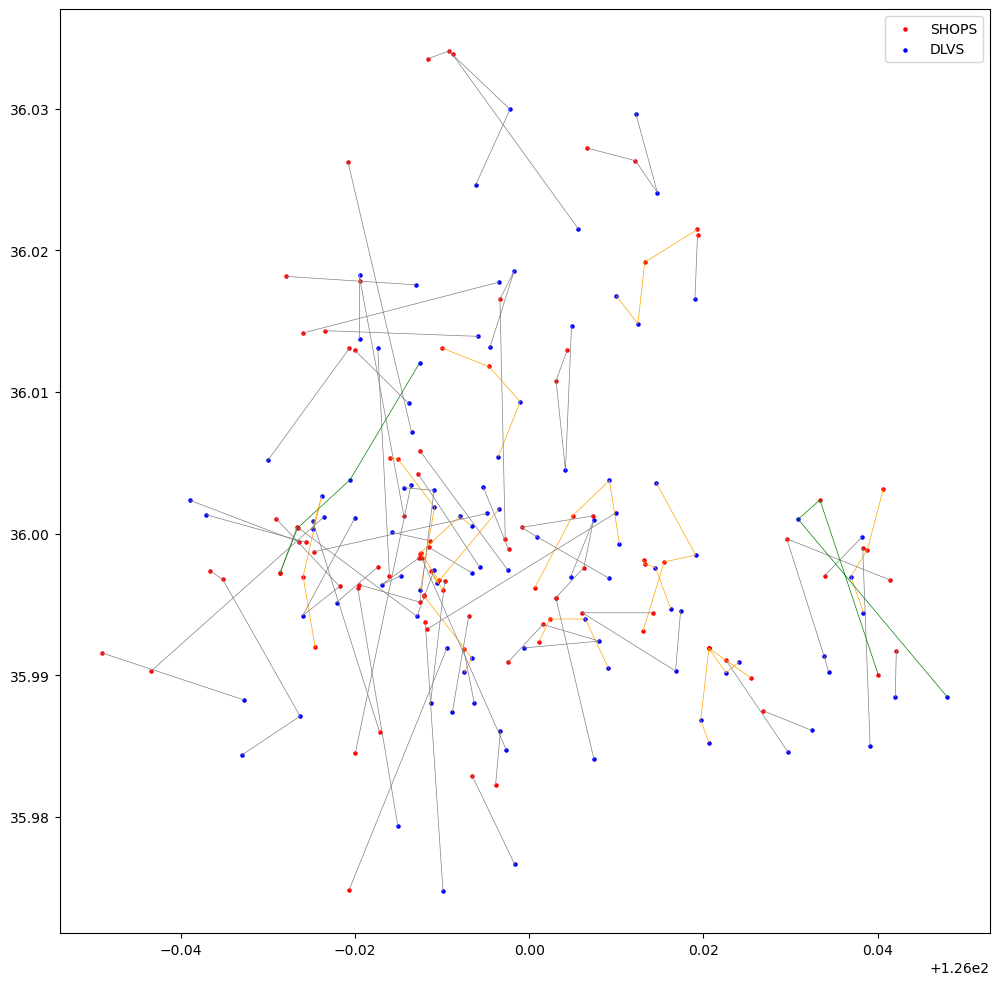

Elapsed time for initializing: 0.4527890682220459
single order bundle
WALK: 총 8개
  길이 2: 8개
BIKE: 총 16개
  길이 2: 3개
  길이 3: 10개
  길이 4: 3개
CAR: 총 17개
  길이 1: 1개
  길이 2: 13개
  길이 3: 3개
[Bundle(all_orders, WALK, [77, 80], [77, 80], 43, True), Bundle(all_orders, WALK, [46, 62], [46, 62], 24, True), Bundle(all_orders, WALK, [61, 68], [61, 68], 39, True), Bundle(all_orders, WALK, [28, 35], [28, 35], 39, True), Bundle(all_orders, WALK, [86, 93], [93, 86], 38, True), Bundle(all_orders, WALK, [74, 98], [74, 98], 47, True), Bundle(all_orders, WALK, [56, 70], [56, 70], 33, True), Bundle(all_orders, WALK, [43, 31], [43, 31], 49, True), Bundle(all_orders, CAR, [1, 41], [1, 41], 33, True), Bundle(all_orders, CAR, [3], [3], 44, True), Bundle(all_orders, CAR, [29, 54], [29, 54], 66, True), Bundle(all_orders, CAR, [48, 64], [48, 64], 35, True), Bundle(all_orders, CAR, [65, 60], [60, 65], 50, True), Bundle(all_orders, CAR, [69, 83], [69, 83], 143, True), Bundle(all_orders, BIKE, [97, 71], [71, 97], 49, 

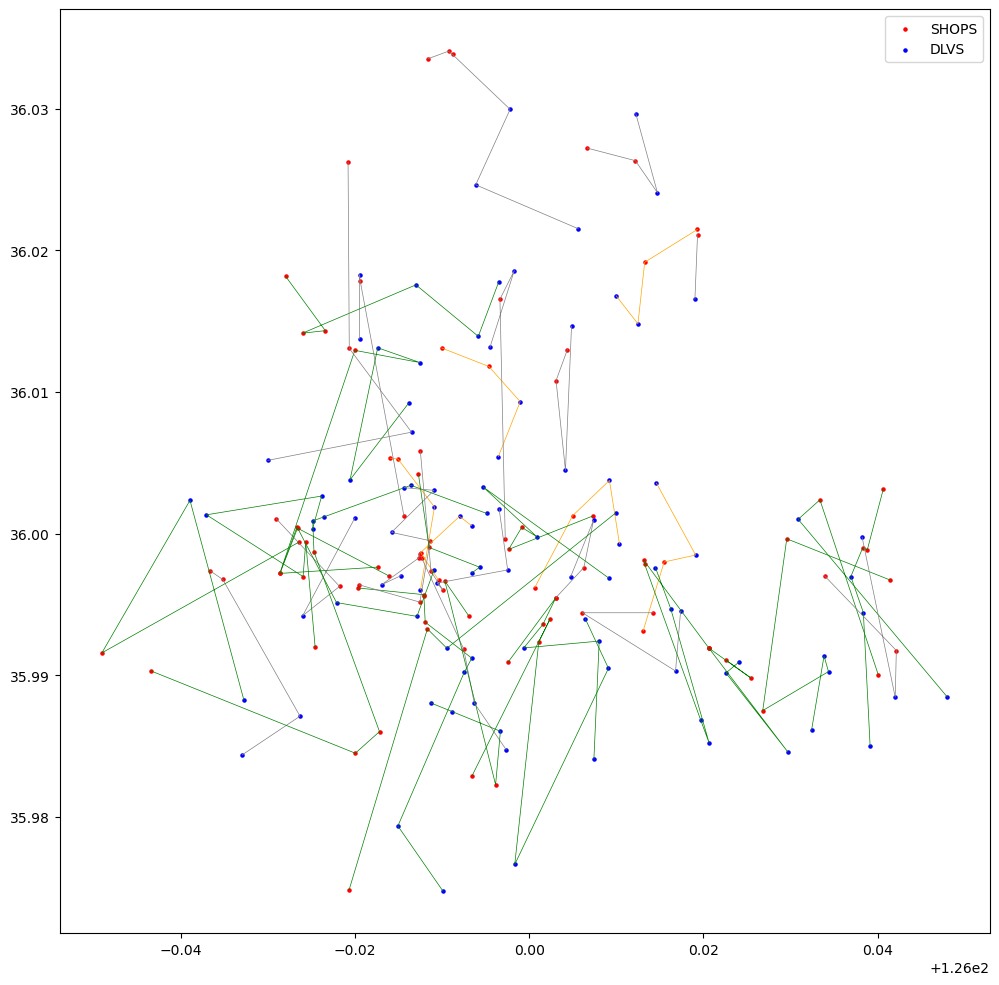

WALK: 총 6개
  길이 2: 6개
BIKE: 총 18개
  길이 2: 4개
  길이 3: 10개
  길이 4: 4개
CAR: 총 16개
  길이 1: 1개
  길이 2: 12개
  길이 3: 3개
[['WALK', [46, 62], [46, 62]], ['WALK', [61, 68], [61, 68]], ['WALK', [28, 35], [28, 35]], ['WALK', [74, 98], [74, 98]], ['WALK', [56, 70], [56, 70]], ['WALK', [43, 31], [43, 31]], ['CAR', [1, 41], [1, 41]], ['CAR', [3], [3]], ['CAR', [29, 54], [29, 54]], ['CAR', [48, 64], [48, 64]], ['CAR', [65, 60], [60, 65]], ['CAR', [69, 83], [69, 83]], ['BIKE', [97, 71], [71, 97]], ['CAR', [72, 88], [72, 88]], ['CAR', [78, 84], [78, 84]], ['CAR', [91, 99], [99, 91]], ['CAR', [92, 96], [96, 92]], ['BIKE', [37, 42], [37, 42]], ['BIKE', [24, 23, 15, 30], [23, 15, 24, 30]], ['CAR', [51, 44, 36], [51, 44, 36]], ['BIKE', [19, 33, 22, 16], [22, 19, 33, 16]], ['CAR', [94, 95], [95, 94]], ['BIKE', [52, 66, 50], [52, 66, 50]], ['BIKE', [12, 27], [12, 27]], ['BIKE', [47, 49, 59], [59, 47, 49]], ['CAR', [14, 58, 53], [58, 14, 53]], ['BIKE', [73, 57, 90], [57, 73, 90]], ['BIKE', [40, 45, 67, 82], [4

{'total_cost': 397935.00000000006,
 'avg_cost': 3979.3500000000004,
 'num_drivers': 40,
 'total_dist': 157354,
 'feasible': True,
 'infeasibility': None,
 'bundles': [['WALK', [46, 62], [46, 62]],
  ['WALK', [61, 68], [61, 68]],
  ['WALK', [28, 35], [28, 35]],
  ['WALK', [74, 98], [74, 98]],
  ['WALK', [56, 70], [56, 70]],
  ['WALK', [43, 31], [43, 31]],
  ['CAR', [1, 41], [1, 41]],
  ['CAR', [3], [3]],
  ['CAR', [29, 54], [29, 54]],
  ['CAR', [48, 64], [48, 64]],
  ['CAR', [65, 60], [60, 65]],
  ['CAR', [69, 83], [69, 83]],
  ['BIKE', [97, 71], [71, 97]],
  ['CAR', [72, 88], [72, 88]],
  ['CAR', [78, 84], [78, 84]],
  ['CAR', [91, 99], [99, 91]],
  ['CAR', [92, 96], [96, 92]],
  ['BIKE', [37, 42], [37, 42]],
  ['BIKE', [24, 23, 15, 30], [23, 15, 24, 30]],
  ['CAR', [51, 44, 36], [51, 44, 36]],
  ['BIKE', [19, 33, 22, 16], [22, 19, 33, 16]],
  ['CAR', [94, 95], [95, 94]],
  ['BIKE', [52, 66, 50], [52, 66, 50]],
  ['BIKE', [12, 27], [12, 27]],
  ['BIKE', [47, 49, 59], [59, 47, 49]],
  [

In [22]:
problem_file = r'F:\work\main\stage1_problems\STAGE1_1.json'
timelimit = 60

# np.random.seed(1)

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

alg_start_time = time.time()

exception = None

solution = None
try:
    # Run algorithm!
    solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
except Exception as e:
    exception = f'{e}'


alg_end_time = time.time()

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

checked_solution['time'] = alg_end_time - alg_start_time
checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
checked_solution['exception'] = exception

checked_solution['prob_name'] = prob['name']
checked_solution['prob_file'] = problem_file

checked_solution

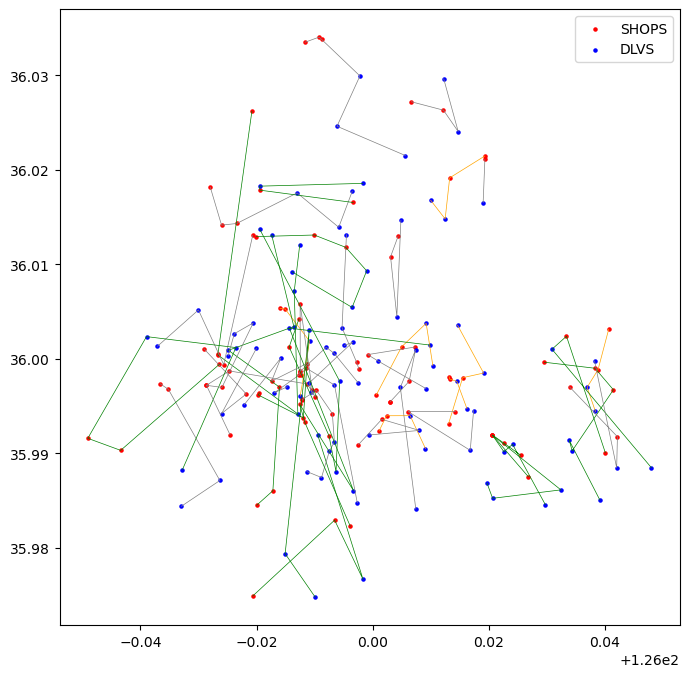

In [47]:
draw_route_solution(ALL_ORDERS, checked_solution)

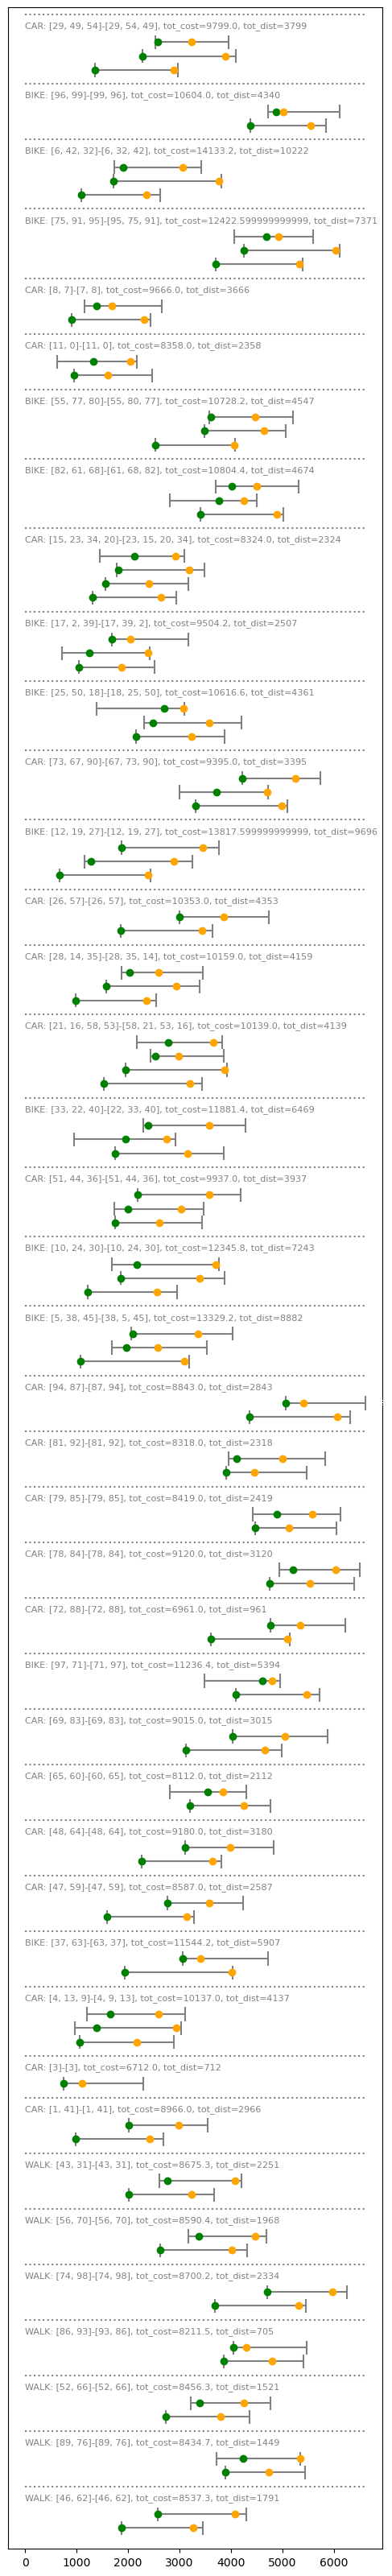

In [48]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)